In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [2]:
headway_df = pd.read_csv('..\Data\headway_data_with_datetimes.csv')

In [3]:
headway_df.iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN
5,120230801,1,99457895,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN
6,120230801,1,99457896,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0
8,120230801,1,99457898,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0
9,120230801,1,99457899,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0


In [4]:
headway_df.iloc[0:30,20:]

,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS
0,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,2023-08-01 - 345104,22,ON TIME
1,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,2023-08-01 - 345104,22,ON TIME
2,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,2023-08-01 - 345104,22,ON TIME
3,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,2023-08-01 - 345104,22,ON TIME
4,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,2023-08-01 - 345105,22,ON TIME
5,NaN,NaN,0,0,1,0,0.0,0,51,0.000000,2023-08-01 - 345105,22,ON TIME
6,NaN,NaN,0,0,1,0,NaN,0,62,0.000000,2023-08-01 - 345105,22,ON TIME
7,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666,2023-08-01 - 345106,22,ON TIME
8,36.966666,1.966666,0,0,1,0,0.0,0,70,0.000000,2023-08-01 - 345106,22,ON TIME
9,14.516666,-0.483334,0,0,1,0,0.0,0,80,0.000000,2023-08-01 - 345106,22,ON TIME


In [5]:
trip_id_list = headway_df['TRIP_ID']
trip_id_list_unique = trip_id_list.unique()
len(trip_id_list_unique)

3987

In [6]:
calendar_id_list = headway_df['CALENDAR_ID']
calendar_id_list_unique = calendar_id_list.unique()
print(calendar_id_list_unique)

[120230801 120230802 120230803 120230804 120230805 120230806 120230807
 120230808 120230809 120230810 120230811 120230812 120230813 120230814
 120230815 120230816 120230817 120230818 120230819 120230820 120230821
 120230822 120230823 120230824 120230825 120230826 120230827 120230828
 120230829 120230830 120230831 120230901 120230902 120230903 120230904
 120230905 120230906 120230907 120230908 120230909 120230910 120230911
 120230912 120230913 120230914 120230915 120230916 120230917 120230918
 120230919 120230920 120230921 120230922 120230923 120230924 120230925
 120230926 120230927 120230928 120230929 120230930]


In [7]:
headway_df['SCHEDULED_TIME']=pd.to_datetime(headway_df['SCHEDULED_TIME'])

In [8]:
headway_df['ACTUAL_ARRIVAL_TIME']=pd.to_datetime(headway_df['ACTUAL_ARRIVAL_TIME'])

In [9]:
headway_df['ACTUAL_DEPARTURE_TIME']=pd.to_datetime(headway_df['ACTUAL_DEPARTURE_TIME'])

In [10]:
#headway_df['DATE']=pd.to_datetime(headway_df['DATE']).dt.date

In [11]:
#Old loop for sequence order and datetimes using headway_data_with_routes.csv

# start_time = time.time()
# headway_df_adj = pd.DataFrame(None)
# for day in calendar_id_list_unique:    
#     sched_start_dict = {}
#     actual_start_dict = {}
#     headway_df_day = headway_df[headway_df['CALENDAR_ID']==day].copy()
#     headway_df_day = headway_df_day.reset_index(drop=True)
#     for i in range(len(headway_df_day)):
#         if headway_df_day.loc[i,'TRIP_EDGE'] == 1:
#             headway_df_day.loc[i,'ROUTE_START_SEQ'] = headway_df_day.loc[i,'ROUTE_STOP_SEQUENCE']
#             try:
#                 sched_start_dict.update({headway_df_day.loc[i,'TRIP_ID']:datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'SCHEDULED_TIME'])})
#             except:
#                 pass
            
#             try:
#                 actual_start_dict.update({headway_df.loc[i,'TRIP_ID']:datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME'])})
#             except:
#                 pass        
#         else:
#             headway_df_day.loc[i,'ROUTE_START_SEQ'] = np.nan
    
#     #Scheduled time now datetime
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'SCHEDULED_TIME'] = datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'SCHEDULED_TIME'])
#         except:
#             pass
        
#     #Actual Arrival Time now datetime
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ACTUAL_ARRIVAL_TIME'] = datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'ACTUAL_ARRIVAL_TIME'])
#         except:
#             pass
  
#     #Actual Departure Time now datetime
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME'] = datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME'])
#         except:
#             pass

#     #Scheduled Trip Start Time
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ROUTE_SCHED_START'] = sched_start_dict[headway_df_day.loc[i,'TRIP_ID']]
#         except:
#             pass
    
#     #Actual Trip Start Time
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ROUTE_ACTUAL_START'] = actual_start_dict[headway_df_day.loc[i,'TRIP_ID']]
#         except:
#             pass
    
#     #Sequence adjustment
#     route_start_df = headway_df_day.groupby('TRIP_ID',as_index=False)['ROUTE_START_SEQ'].max()   
#     route_start_dict = dict(zip(route_start_df['TRIP_ID'], route_start_df['ROUTE_START_SEQ']))
#     for i in range(len(headway_df_day)):
#         headway_df_day.loc[i,'ROUTE_START_SEQ'] = route_start_dict[headway_df_day.loc[i,'TRIP_ID']]
    
#     if headway_df_adj.empty:
#         headway_df_adj = headway_df_day.copy()
#     else:
#         headway_df_adj = pd.concat([headway_df_adj,headway_df_day], ignore_index=True)
    
#     print(f'{day} day is done compiling.')

# print(f"Complete! Compliling the full adjusted time and sequence dataframe took: {time.time()-start_time:.2f} seconds")
# headway_df_adj.iloc[0:10,30:]

In [12]:
start_time = time.time()
headway_df_adj = pd.DataFrame(None)
for day in calendar_id_list_unique:    
    sched_start_dict = {}
    actual_start_dict = {}
    headway_df_day = headway_df[headway_df['CALENDAR_ID']==day].copy()
    headway_df_day = headway_df_day.reset_index(drop=True)
    for i in range(len(headway_df_day)):
        if headway_df_day.loc[i,'TRIP_EDGE'] == 1:
            headway_df_day.loc[i,'ROUTE_START_SEQ'] = headway_df_day.loc[i,'ROUTE_STOP_SEQUENCE']
            try:
                sched_start_dict.update({headway_df_day.loc[i,'TRIP_ID']:headway_df_day.loc[i,'SCHEDULED_TIME']})
            except:
                pass
            
            try:
                actual_start_dict.update({headway_df.loc[i,'TRIP_ID']:headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME']})
            except:
                pass        
        else:
            headway_df_day.loc[i,'ROUTE_START_SEQ'] = np.nan
        

    #Scheduled Trip Start Time
    for i in range(len(headway_df_day)):
        try:
            headway_df_day.loc[i,'ROUTE_SCHED_START'] = sched_start_dict[headway_df_day.loc[i,'TRIP_ID']]
        except:
            pass
    
    #Actual Trip Start Time
    for i in range(len(headway_df_day)):
        try:
            headway_df_day.loc[i,'ROUTE_ACTUAL_START'] = actual_start_dict[headway_df_day.loc[i,'TRIP_ID']]
        except:
            pass
    
    #Sequence adjustment
    route_start_df = headway_df_day.groupby('TRIP_ID',as_index=False)['ROUTE_START_SEQ'].max()   
    route_start_dict = dict(zip(route_start_df['TRIP_ID'], route_start_df['ROUTE_START_SEQ']))
    for i in range(len(headway_df_day)):
        headway_df_day.loc[i,'ROUTE_START_SEQ'] = route_start_dict[headway_df_day.loc[i,'TRIP_ID']]
    
    if headway_df_adj.empty:
        headway_df_adj = headway_df_day.copy()
    else:
        headway_df_adj = pd.concat([headway_df_adj,headway_df_day], ignore_index=True)
    
    print(f'{day} day is done compiling.')

print(f"Complete! Compliling the full adjusted time and sequence dataframe took: {time.time()-start_time:.2f} seconds")
headway_df_adj.iloc[0:10,30:]

120230801 day is done compiling.
120230802 day is done compiling.
120230803 day is done compiling.
120230804 day is done compiling.
120230805 day is done compiling.
120230806 day is done compiling.
120230807 day is done compiling.
120230808 day is done compiling.
120230809 day is done compiling.
120230810 day is done compiling.
120230811 day is done compiling.
120230812 day is done compiling.
120230813 day is done compiling.
120230814 day is done compiling.
120230815 day is done compiling.
120230816 day is done compiling.
120230817 day is done compiling.
120230818 day is done compiling.
120230819 day is done compiling.
120230820 day is done compiling.
120230821 day is done compiling.
120230822 day is done compiling.
120230823 day is done compiling.
120230824 day is done compiling.
120230825 day is done compiling.
120230826 day is done compiling.
120230827 day is done compiling.
120230828 day is done compiling.
120230829 day is done compiling.
120230830 day is done compiling.
120230831 

,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START
0,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
1,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
2,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
3,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
4,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35
5,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35
6,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35
7,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43
8,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43
9,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43


In [13]:
#Trying to refactor code with itertuples(). Need to adjust loops to not create new columns since tuples now.
#Could I also just refactor with np.where()?

# start_time = time.time()
# headway_df_adj = pd.DataFrame(None)
# for day in calendar_id_list_unique:    
#     sched_start_dict = {}
#     actual_start_dict = {}
#     headway_df_day = headway_df[headway_df['CALENDAR_ID']==day].copy()
#     headway_df_day = headway_df_day.reset_index(drop=True)
#     for row in headway_df_day.itertuples():
#         if row.TRIP_EDGE == 1:
#             row.ROUTE_START_SEQ = row.ROUTE_STOP_SEQUENCE
#             try:
#                 sched_start_dict.update({row.TRIP_ID:row.SCHEDULED_TIME})
#             except:
#                 pass
            
#             try:
#                 actual_start_dict.update({row.TRIP_ID:row.ACTUAL_DEPARTURE_TIME})
#             except:
#                 pass        
#         else:
#             row.ROUTE_START_SEQ = np.nan
        

#     #Scheduled Trip Start Time
#     for row in headway_df_day.itertuples():
#         try:
#             row.ROUTE_SCHED_START = sched_start_dict[row.TRIP_ID]
#         except:
#             pass
    
#     #Actual Trip Start Time
#     for row in headway_df_day.itertuples():
#         try:
#             row.ROUTE_ACTUAL_START = actual_start_dict[row.TRIP_ID]
#         except:
#             pass
    
#     #Sequence adjustment
#     route_start_df = headway_df_day.groupby('TRIP_ID',as_index=False)['ROUTE_START_SEQ'].max()   
#     route_start_dict = dict(zip(route_start_df['TRIP_ID'], route_start_df['ROUTE_START_SEQ']))
#     for row in headway_df_day.itertuples():
#         row.ROUTE_START_SEQ = route_start_dict[row.TRIP_ID]
    
#     if headway_df_adj.empty:
#         headway_df_adj = headway_df_day.copy()
#     else:
#         headway_df_adj = pd.concat([headway_df_adj,headway_df_day], ignore_index=True)
    
#     print(f'{day} day is done compiling.')

# print(f"Complete! Compliling the full adjusted time and sequence dataframe took: {time.time()-start_time:.2f} seconds")
# headway_df_adj.iloc[0:10,30:]

In [14]:
headway_df_adj['STOP_SEQ_ADJ'] = abs(headway_df_adj['ROUTE_START_SEQ']-headway_df_adj['ROUTE_STOP_SEQUENCE'])+1
headway_df_adj.iloc[0:10,30:]

,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ
0,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,1.0
1,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,5.0
2,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,10.0
3,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,14.0
4,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35,1.0
5,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35,5.0
6,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35,14.0
7,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,1.0
8,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,5.0
9,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,10.0


In [15]:
headway_df_adj[headway_df_adj['CALENDAR_ID']==120230808]['SCHEDULED_TIME'].dropna().sort_values()

40905   2023-08-08 04:20:00
44033   2023-08-08 04:23:00
40906   2023-08-08 04:29:00
44034   2023-08-08 04:30:00
45175   2023-08-08 04:30:00
                ...        
45052   2023-08-09 00:57:00
41578   2023-08-09 00:57:00
43264   2023-08-09 00:57:00
43265   2023-08-09 01:02:00
41579   2023-08-09 01:05:00
Name: SCHEDULED_TIME, Length: 6481, dtype: datetime64[ns]

In [16]:
headway_df_adj['ROUTE_ACTUAL_START'].isna().sum()

331775

In [17]:
headway_df_adj.tail(50)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ
350278,120230930,2,100406565,2023-09-30,HILLSBORO,702,2103,353433,0,FROM DOWNTOWN,...,0,179,0.000000,2023-09-30 - 353433,7,ON TIME,3.0,2023-09-30 11:45:00,NaT,2.0
350279,120230930,2,100406566,2023-09-30,HILLSBORO,702,2103,353433,0,FROM DOWNTOWN,...,0,193,0.000000,2023-09-30 - 353433,7,ON TIME,3.0,2023-09-30 11:45:00,NaT,3.0
350280,120230930,2,100406567,2023-09-30,HILLSBORO,702,2103,353434,0,TO DOWNTOWN,...,0,194,17.066666,2023-09-30 - 353434,7,ON TIME,5.0,2023-09-30 12:36:00,NaT,1.0
350281,120230930,2,100406568,2023-09-30,HILLSBORO,702,2103,353434,0,TO DOWNTOWN,...,0,203,0.000000,2023-09-30 - 353434,7,ON TIME,5.0,2023-09-30 12:36:00,NaT,2.0
350282,120230930,2,100406569,2023-09-30,HILLSBORO,702,2103,353434,0,TO DOWNTOWN,...,0,215,0.000000,2023-09-30 - 353434,7,ON TIME,5.0,2023-09-30 12:36:00,NaT,3.0
350283,120230930,2,100406570,2023-09-30,HILLSBORO,702,2103,353435,0,FROM DOWNTOWN,...,0,216,12.533333,2023-09-30 - 353435,7,ON TIME,3.0,2023-09-30 13:15:00,NaT,1.0
350284,120230930,2,100406571,2023-09-30,HILLSBORO,702,2103,353435,0,FROM DOWNTOWN,...,0,227,0.000000,2023-09-30 - 353435,7,ON TIME,3.0,2023-09-30 13:15:00,NaT,2.0
350285,120230930,2,100406572,2023-09-30,HILLSBORO,702,2103,353435,0,FROM DOWNTOWN,...,0,241,0.000000,2023-09-30 - 353435,7,ON TIME,3.0,2023-09-30 13:15:00,NaT,3.0
350286,120230930,2,100406573,2023-09-30,HILLSBORO,702,2103,353436,0,TO DOWNTOWN,...,0,242,17.300000,2023-09-30 - 353436,7,ON TIME,5.0,2023-09-30 14:06:00,NaT,1.0
350287,120230930,2,100406574,2023-09-30,HILLSBORO,702,2103,353436,0,TO DOWNTOWN,...,0,251,0.000000,2023-09-30 - 353436,7,ON TIME,5.0,2023-09-30 14:06:00,NaT,2.0


In [18]:
headway_df_adj['HDWY_DEV_PCT'] = 100 * headway_df_adj['HDWY_DEV']/headway_df_adj['SCHEDULED_HDWY']

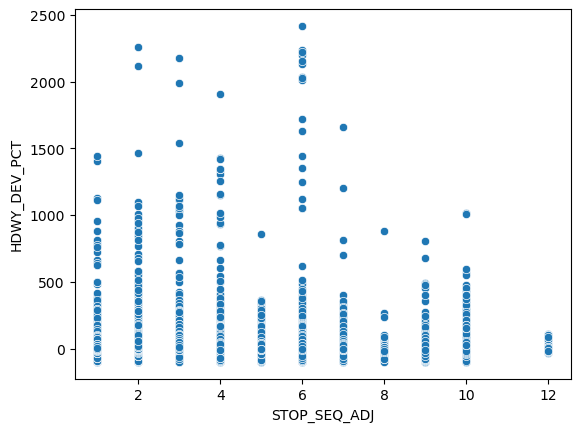

In [19]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ', y='HDWY_DEV_PCT');

In [62]:
# all unique keys
color_keys = headway_df_adj['ROUTE_ABBR'].unique()

# create key: color dictionary
colors = dict(zip(color_keys, sns.color_palette(['blue','coral','green','crimson','purple','sienna','violet','grey'])))

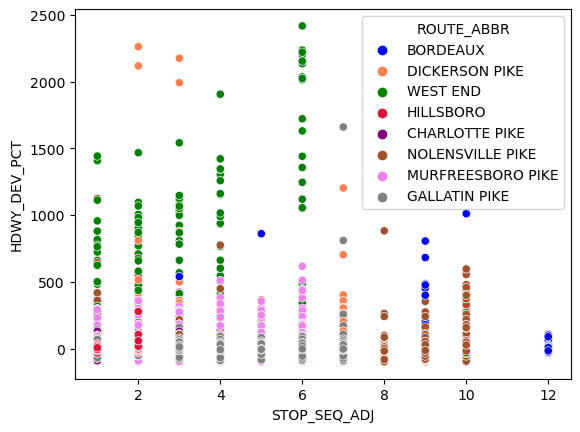

In [63]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ', y='HDWY_DEV_PCT',hue='ROUTE_ABBR', palette = colors);

In [21]:
stop_seq_hdwy_dev_stdv_df = headway_df_adj.groupby(['ROUTE_ABBR','STOP_SEQ_ADJ'])['HDWY_DEV_PCT'].std().dropna().to_frame()
stop_seq_hdwy_dev_stdv_df

HDWY_DEV_PCT
ROUTE_ABBR        STOP_SEQ_ADJ              
BORDEAUX          1.0              26.348619
                  2.0              28.941395
                  3.0              32.616108
                  5.0              33.622214
                  9.0              63.821547
                  10.0             45.567104
                  12.0             15.938272
CHARLOTTE PIKE    2.0              25.620868
                  3.0              28.078292
                  4.0              29.442590
                  5.0              31.067449
DICKERSON PIKE    1.0              32.477580
                  2.0              50.087331
                  3.0              51.159920
                  4.0              38.065043
                  5.0              39.569508
                  7.0              47.386014
GALLATIN PIKE     2.0              28.053192
                  3.0              33.333628
                  4.0              38.810159
                  5.0              40.606857
                  6.0              46.891343
                  7.0              56.773169
HILLSBORO         1.0              28.386372
                  2.0              37.823259
MURFREESBORO PIKE 2.0              45.930867
                  3.0              48.621698
                  4.0              54.729973
                  5.0              58.684540
                  6.0              62.247584
NOLENSVILLE PIKE  1.0              37.773992
                  2.0              42.075623
                  3.0              44.510739
                  4.0              46.624905
                  5.0              38.239851
                  6.0              40.540152
                  7.0              40.755286
                  8.0              94.061148
                  9.0              36.679205
                  10.0             85.735464
WEST END          1.0              47.757820
                  2.0              56.165492
                  3.0              66.062823
                  4.0              69.569470
                  5.0              37.335261
                  6.0             125.793519

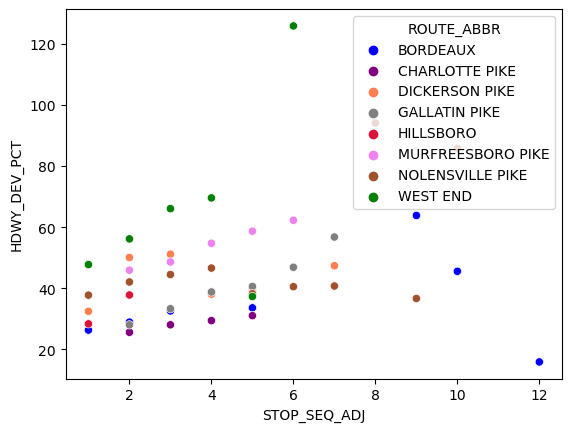

In [64]:
sns.scatterplot(data=stop_seq_hdwy_dev_stdv_df, x= 'STOP_SEQ_ADJ', y='HDWY_DEV_PCT',hue='ROUTE_ABBR', palette = colors);
#sns.factorplot("age", "jobs", col="industry", row="city", data=df_city,
#               margin_titles=True, size=3, aspect=.8, palette=["darkred"])

<Axes: xlabel='ROUTE_ABBR,STOP_SEQ_ADJ'>

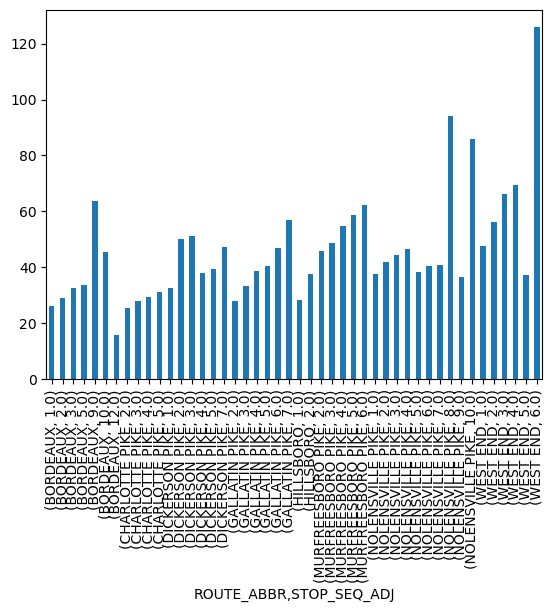

In [23]:
headway_df_adj.groupby(['ROUTE_ABBR','STOP_SEQ_ADJ'])['HDWY_DEV_PCT'].std().dropna().plot.bar()

In [24]:
#Adjusted Corrected Trip ID for Overload ID
headway_df_adj['CORRECTED_TRIP_ID2'] = headway_df_adj['CORRECTED_TRIP_ID'].astype(str) + '-' + headway_df_adj['OVERLOAD_ID'].astype(str)

In [25]:
headway_df_adj['STOP_SEQ_ADJ_RANK'] = headway_df_adj.groupby(['CORRECTED_TRIP_ID'])['STOP_SEQ_ADJ'].rank('max').copy()

In [26]:
#Adjusted STOP_SEQ_ADJ_RANK2 for Overload ID
headway_df_adj['STOP_SEQ_ADJ_RANK2'] = headway_df_adj.groupby(['CORRECTED_TRIP_ID2'])['STOP_SEQ_ADJ'].rank('max').copy()

In [27]:
headway_df_adj[headway_df_adj['TRIP_ID']==345104].iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN
6461,120230802,1,99491784,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-02 04:42:00,2023-08-02 04:34:38,2023-08-02 04:44:27,-2.450000,NaN
6462,120230802,1,99491785,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-02 04:46:00,2023-08-02 04:49:00,2023-08-02 04:49:00,-3.000000,NaN
6463,120230802,1,99491786,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-02 04:54:00,2023-08-02 04:54:19,2023-08-02 04:54:19,-0.316666,NaN
6464,120230802,1,99491787,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-02 05:10:00,2023-08-02 05:01:59,2023-08-02 05:01:59,8.016666,NaN
12911,120230803,1,99525645,2023-08-03,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-03 04:42:00,2023-08-03 04:04:39,2023-08-03 04:42:46,-0.766666,NaN
12912,120230803,1,99525646,2023-08-03,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-03 04:46:00,2023-08-03 04:47:03,2023-08-03 04:47:03,-1.050000,NaN


In [28]:
len(headway_df_adj)

350328

In [29]:
headway_df_adj.iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN
5,120230801,1,99457895,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN
6,120230801,1,99457896,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0
8,120230801,1,99457898,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0
9,120230801,1,99457899,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0


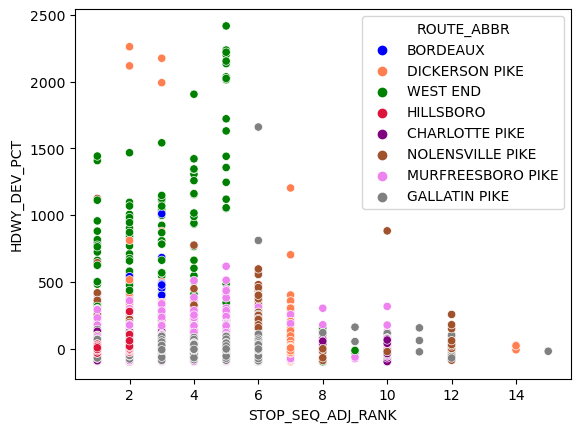

In [65]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ_RANK', y='HDWY_DEV_PCT', hue='ROUTE_ABBR', palette = colors);

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


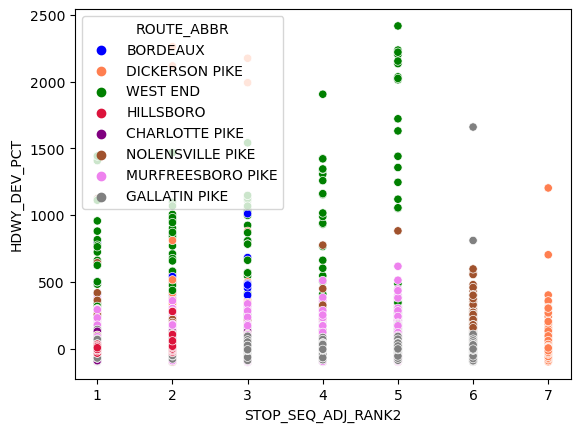

In [66]:
#Adjusted STOP_SEQ_ADJ_RANK2 for Overload ID
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ_RANK2', y='HDWY_DEV_PCT', hue='ROUTE_ABBR', palette = colors);

In [32]:
headway_df_adj_subset = headway_df_adj[headway_df_adj['HDWY_DEV_PCT']<100]

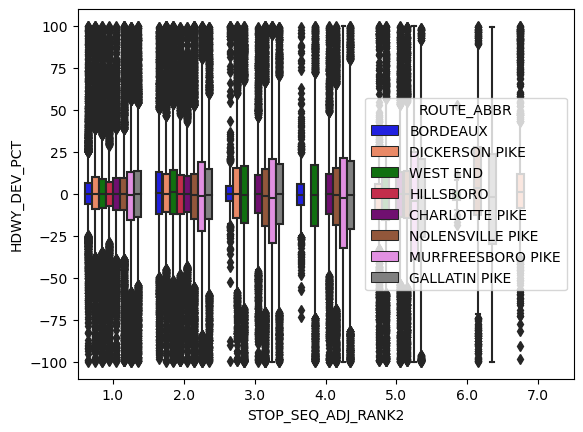

In [67]:
sns.boxplot(data=headway_df_adj_subset, x= 'STOP_SEQ_ADJ_RANK2', y='HDWY_DEV_PCT', hue='ROUTE_ABBR', palette = colors);

In [34]:
stop_seq_rank_hdwy_dev_stdv_df = headway_df_adj.groupby(['ROUTE_ABBR','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].std().dropna().to_frame()
stop_seq_rank_hdwy_dev_stdv_df

HDWY_DEV_PCT
ROUTE_ABBR        STOP_SEQ_ADJ_RANK2              
BORDEAUX          1.0                    26.348619
                  2.0                    32.626861
                  3.0                    63.444811
                  4.0                    19.310319
CHARLOTTE PIKE    2.0                    25.620868
                  3.0                    28.076258
                  4.0                    29.442590
                  5.0                    31.069698
DICKERSON PIKE    1.0                    32.477580
                  2.0                    50.087331
                  3.0                    50.991232
                  5.0                    39.569508
                  7.0                    47.386014
GALLATIN PIKE     2.0                    30.963507
                  3.0                    35.728452
                  4.0                    40.012940
                  5.0                    46.889591
                  6.0                    56.735875
HILLSBORO         1.0                    28.399634
                  2.0                    37.814917
MURFREESBORO PIKE 2.0                    47.225838
                  3.0                    51.731007
                  4.0                    55.741148
                  5.0                    62.220905
NOLENSVILLE PIKE  1.0                    37.800867
                  2.0                    41.065532
                  3.0                    43.542314
                  4.0                    45.181084
                  5.0                    39.992163
                  6.0                    76.657919
WEST END          1.0                    47.757970
                  2.0                    56.174682
                  3.0                    60.061818
                  4.0                    69.845746
                  5.0                   126.620222
                  6.0                     9.728845

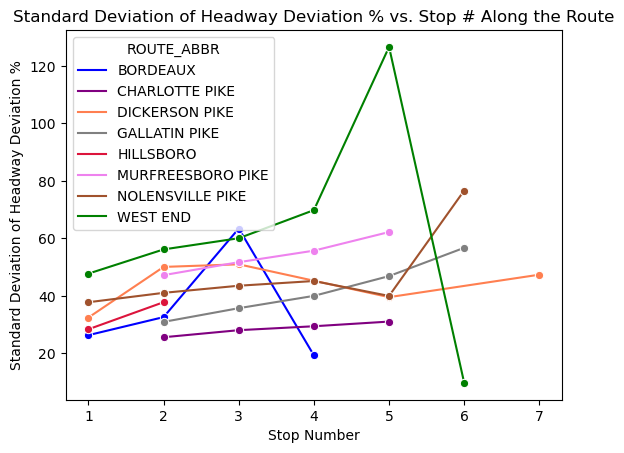

In [68]:
sns.lineplot(data=stop_seq_rank_hdwy_dev_stdv_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR', palette = colors, marker = 'o').set(title='Standard Deviation of Headway Deviation % vs. Stop # Along the Route', xlabel = 'Stop Number', ylabel = 'Standard Deviation of Headway Deviation %');

In [36]:
stop_seq_rank_hdwy_dev_mean_df = headway_df_adj.groupby(['ROUTE_ABBR','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].mean().dropna().to_frame()
stop_seq_rank_hdwy_dev_mean_df

HDWY_DEV_PCT
ROUTE_ABBR        STOP_SEQ_ADJ_RANK2              
BORDEAUX          1.0                     2.303221
                  2.0                     3.205123
                  3.0                    11.694578
                  4.0                     1.107283
CHARLOTTE PIKE    2.0                     1.276638
                  3.0                     1.326086
                  4.0                     1.216815
                  5.0                     1.228600
DICKERSON PIKE    1.0                     4.547439
                  2.0                     5.989666
                  3.0                     6.071243
                  5.0                     0.359293
                  7.0                     9.708903
GALLATIN PIKE     2.0                     1.108410
                  3.0                     1.194698
                  4.0                     1.079639
                  5.0                     1.727721
                  6.0                     2.539575
HILLSBORO         1.0                     1.827214
                  2.0                     2.556353
MURFREESBORO PIKE 2.0                     2.312023
                  3.0                     2.246742
                  4.0                     2.789850
                  5.0                     3.144544
NOLENSVILLE PIKE  1.0                     3.547807
                  2.0                     2.650091
                  3.0                     2.254244
                  4.0                     2.784661
                  5.0                     2.585325
                  6.0                    30.867693
WEST END          1.0                     3.810941
                  2.0                     6.152093
                  3.0                     4.821080
                  4.0                     5.508095
                  5.0                    10.357648
                  6.0                    -1.066499

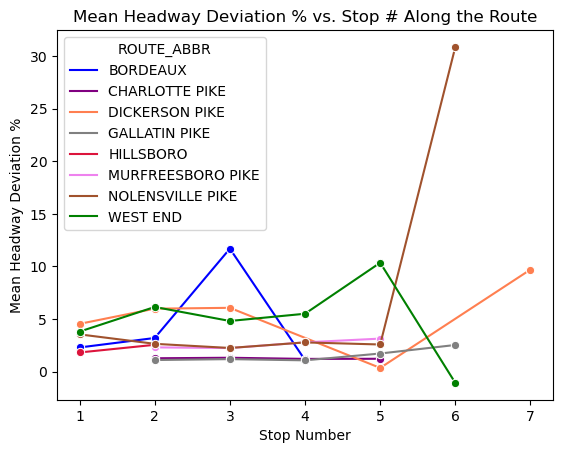

In [69]:
sns.lineplot(data=stop_seq_rank_hdwy_dev_mean_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR', palette = colors, marker = 'o').set(title='Mean Headway Deviation % vs. Stop # Along the Route', xlabel = 'Stop Number', ylabel = 'Mean Headway Deviation %');

In [38]:
headway_df_adj[(headway_df_adj['STOP_SEQ_ADJ_RANK']==15) & (headway_df_adj['ROUTE_ABBR']=='GALLATIN PIKE')].iloc[:,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
325747,120230926,1,100285737,2023-09-26,GALLATIN PIKE,5606,1713,353036,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-26 13:03:00,2023-09-26 13:21:58,2023-09-26 13:21:58,-18.966666,10.0
325790,120230926,1,100285781,2023-09-26,GALLATIN PIKE,5606,1389,353036,1,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-26 13:03:00,NaT,NaT,NaN,10.0
325797,120230926,1,100285788,2023-09-26,GALLATIN PIKE,5606,1389,353036,2,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-26 13:03:00,NaT,NaT,NaN,10.0


In [39]:
type(headway_df_adj['ACTUAL_DEPARTURE_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
headway_df_adj['TIME_SINCE_ACTUAL_START'] = (pd.Series(headway_df_adj['ACTUAL_DEPARTURE_TIME'].dt.to_pydatetime())-pd.Series(headway_df_adj['ROUTE_ACTUAL_START'].dt.to_pydatetime())).dt.total_seconds()/60
headway_df_adj['TIME_SINCE_SCHED_START'] = (pd.Series(headway_df_adj['ACTUAL_DEPARTURE_TIME'].dt.to_pydatetime())-pd.Series(headway_df_adj['ROUTE_SCHED_START'].dt.to_pydatetime())).dt.total_seconds()/60

#First attempt at adjusting for miscalculated time difference values due to overnight change in date
#headway_df_adj.loc[headway_df_adj['TIME_SINCE_ACTUAL_START'] < -50000, 'TIME_SINCE_ACTUAL_START'] = 86400+headway_df_adj['TIME_SINCE_ACTUAL_START']
#headway_df_adj.loc[headway_df_adj['TIME_SINCE_SCHED_START'] < -50000, 'TIME_SINCE_SCHED_START'] = 86400+headway_df_adj['TIME_SINCE_SCHED_START']

In [41]:
headway_df_adj['TIME_SINCE_ACTUAL_START'] = np.where(headway_df_adj['TIME_SINCE_ACTUAL_START']<0,np.nan,headway_df_adj['TIME_SINCE_ACTUAL_START'])

In [42]:
headway_df_adj[headway_df_adj['TIME_SINCE_ACTUAL_START'].isnull()].head(20)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,HDWY_DEV_PCT,CORRECTED_TRIP_ID2,STOP_SEQ_ADJ_RANK,STOP_SEQ_ADJ_RANK2,TIME_SINCE_ACTUAL_START,TIME_SINCE_SCHED_START
39,120230801,1,99457929,2023-08-01,BORDEAUX,2200,1040,345115,0,FROM DOWNTOWN,...,1.0,2023-08-01 10:10:00,2023-08-01 10:11:05,9.0,NaN,2023-08-01 - 345115-0,3.0,3.0,NaN,NaN
40,120230801,1,99457930,2023-08-01,BORDEAUX,2200,1040,345116,0,TO DOWNTOWN,...,9.0,2023-08-01 10:35:00,NaT,1.0,NaN,2023-08-01 - 345116-0,1.0,1.0,NaN,NaN
41,120230801,1,99457931,2023-08-01,BORDEAUX,2200,1040,345116,0,TO DOWNTOWN,...,9.0,2023-08-01 10:35:00,NaT,2.0,-1.000000,2023-08-01 - 345116-0,2.0,2.0,NaN,12.333333
42,120230801,1,99457932,2023-08-01,BORDEAUX,2200,1040,345116,0,TO DOWNTOWN,...,9.0,2023-08-01 10:35:00,NaT,3.0,-0.066668,2023-08-01 - 345116-0,3.0,3.0,NaN,18.600000
43,120230801,1,99457933,2023-08-01,BORDEAUX,2200,1040,345116,0,TO DOWNTOWN,...,9.0,2023-08-01 10:35:00,NaT,5.0,-7.222225,2023-08-01 - 345116-0,4.0,4.0,NaN,25.783333
44,120230801,1,99457934,2023-08-01,BORDEAUX,2200,1040,345116,0,TO DOWNTOWN,...,9.0,2023-08-01 10:35:00,NaT,9.0,NaN,2023-08-01 - 345116-0,5.0,5.0,NaN,35.616667
53,120230801,1,99457943,2023-08-01,BORDEAUX,2200,2374,345120,0,FROM DOWNTOWN,...,1.0,2023-08-01 12:40:00,2023-08-01 12:42:07,9.0,NaN,2023-08-01 - 345120-0,3.0,3.0,NaN,NaN
67,120230801,1,99457957,2023-08-01,BORDEAUX,2200,2374,345124,0,FROM DOWNTOWN,...,1.0,2023-08-01 15:10:00,2023-08-01 15:11:34,9.0,NaN,2023-08-01 - 345124-0,3.0,3.0,NaN,NaN
135,120230801,1,99458027,2023-08-01,BORDEAUX,2201,1617,345215,0,TO DOWNTOWN,...,9.0,2023-08-01 06:00:00,2023-08-01 06:00:08,9.0,NaN,2023-08-01 - 345215-0,7.0,5.0,NaN,NaN
136,120230801,1,99458028,2023-08-01,BORDEAUX,2201,1617,345216,0,FROM DOWNTOWN,...,1.0,2023-08-01 06:45:00,2023-08-01 06:45:50,1.0,NaN,2023-08-01 - 345216-0,2.0,1.0,NaN,NaN


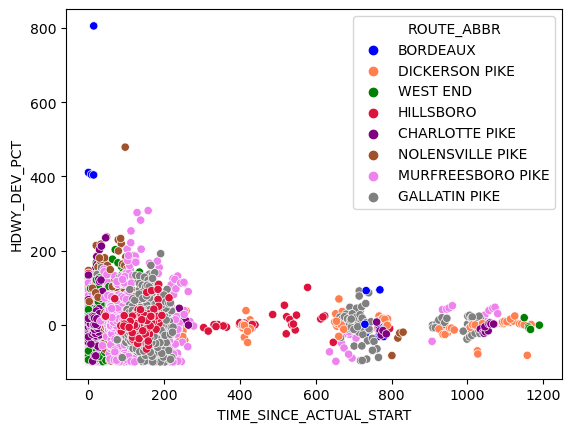

In [70]:
sns.scatterplot(data=headway_df_adj, x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', hue='ROUTE_ABBR', palette = colors);

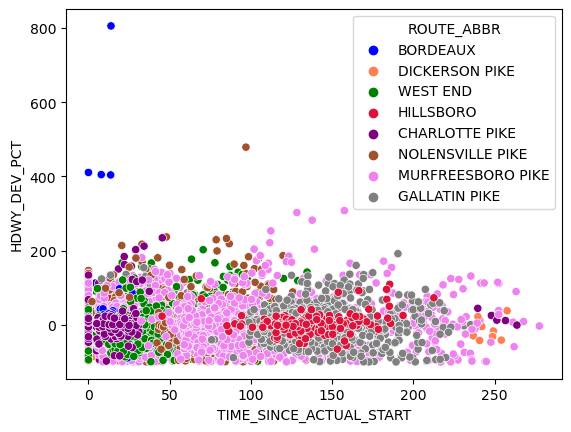

In [71]:
headway_df_adj_actual300 = headway_df_adj[headway_df_adj['TIME_SINCE_ACTUAL_START']<300]
sns.scatterplot(data=headway_df_adj_actual300, x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', hue='ROUTE_ABBR', palette = colors);

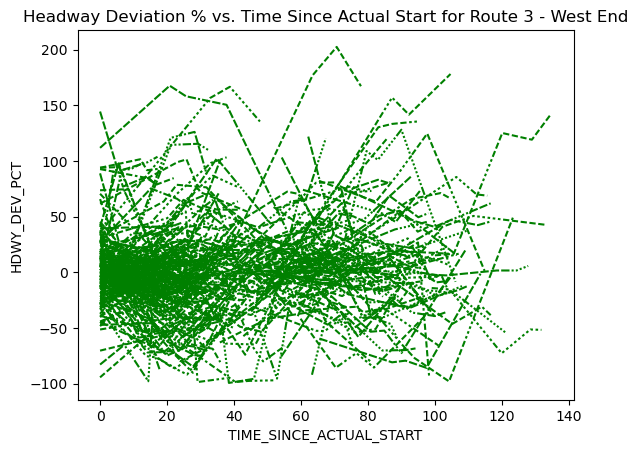

In [45]:
sns.lineplot(data=headway_df_adj_actual300[headway_df_adj_actual300['ROUTE_ABBR']=='WEST END'], x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', color = 'green', style = 'CORRECTED_TRIP_ID2', legend = False).set(title='Headway Deviation % vs. Time Since Actual Start for Route 3 - West End');

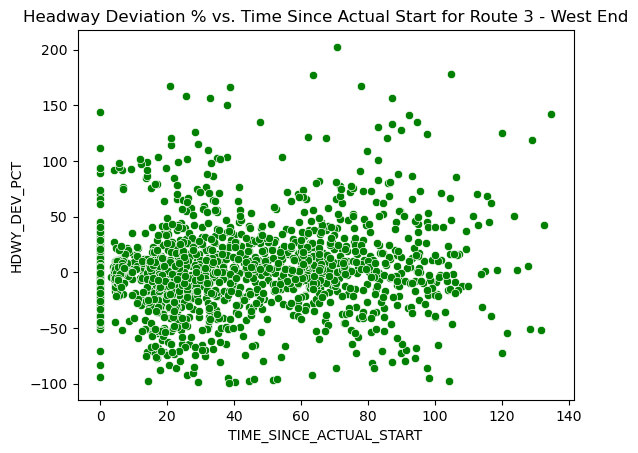

In [46]:
sns.scatterplot(data=headway_df_adj_actual300[headway_df_adj_actual300['ROUTE_ABBR']=='WEST END'], x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', color = 'green').set(title='Headway Deviation % vs. Time Since Actual Start for Route 3 - West End');

In [47]:
headway_df_adj[headway_df_adj['TIME_SINCE_ACTUAL_START']<0].head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,HDWY_DEV_PCT,CORRECTED_TRIP_ID2,STOP_SEQ_ADJ_RANK,STOP_SEQ_ADJ_RANK2,TIME_SINCE_ACTUAL_START,TIME_SINCE_SCHED_START


In [48]:
headway_df_adj[headway_df_adj['TIME_SINCE_ACTUAL_START']<0].iloc[0:50,15:]

,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,...,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,HDWY_DEV_PCT,CORRECTED_TRIP_ID2,STOP_SEQ_ADJ_RANK,STOP_SEQ_ADJ_RANK2,TIME_SINCE_ACTUAL_START,TIME_SINCE_SCHED_START


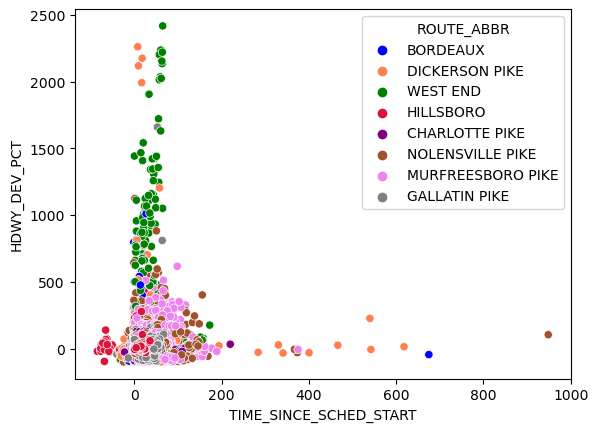

In [72]:
sns.scatterplot(data=headway_df_adj, x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', hue='ROUTE_ABBR', palette = colors);

In [50]:
headway_df_adj[headway_df_adj['HDWY_DEV_PCT']>2200].iloc[:,25:]

,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,HDWY_DEV_PCT,CORRECTED_TRIP_ID2,STOP_SEQ_ADJ_RANK,STOP_SEQ_ADJ_RANK2,TIME_SINCE_ACTUAL_START,TIME_SINCE_SCHED_START
46637,0,0.0,0,2,0.000000,2023-08-08 - 353988,55,ON TIME,7.0,2023-08-08 15:12:00,NaT,1.0,inf,2023-08-08 - 353988-0,1.0,1.0,NaN,2.216667
46643,0,0.0,0,2,2.866666,2023-08-08 - 354106,56,ON TIME,7.0,2023-08-08 15:20:00,NaT,1.0,inf,2023-08-08 - 354106-0,1.0,1.0,NaN,3.566667
48742,0,0.0,0,2,56.283333,2023-08-09 - 351236,50,ON TIME,10.0,2023-08-09 15:10:00,NaT,1.0,inf,2023-08-09 - 351236-0,1.0,1.0,NaN,1.533333
55175,0,0.0,0,91,0.000000,2023-08-10 - 351225,3,LATE,2.0,2023-08-10 15:02:00,NaT,6.0,2236.666650,2023-08-10 - 351225-0,5.0,5.0,NaN,60.783333
55236,0,0.0,0,2,0.000000,2023-08-10 - 351236,50,ON TIME,10.0,2023-08-10 15:10:00,NaT,1.0,inf,2023-08-10 - 351236-0,1.0,1.0,NaN,0.466667
55250,0,0.0,0,2,20.266666,2023-08-10 - 351239,56,ON TIME,7.0,2023-08-10 15:20:00,NaT,1.0,inf,2023-08-10 - 351239-0,1.0,1.0,NaN,2.900000
61749,0,0.0,0,2,0.000000,2023-08-11 - 351236,50,ON TIME,10.0,2023-08-11 15:10:00,NaT,1.0,inf,2023-08-11 - 351236-0,1.0,1.0,NaN,0.400000
76138,0,0.0,0,2,25.366666,2023-08-14 - 351239,56,EARLY,7.0,2023-08-14 15:20:00,NaT,1.0,inf,2023-08-14 - 351239-0,1.0,1.0,NaN,-1.066667
95638,0,0.0,0,2,17.233333,2023-08-17 - 351236,50,LATE,10.0,2023-08-17 15:10:00,NaT,1.0,inf,2023-08-17 - 351236-0,1.0,1.0,NaN,9.400000
99700,0,0.0,0,2,3.966666,2023-08-17 - 353246,55,ON TIME,7.0,2023-08-17 15:12:00,NaT,1.0,inf,2023-08-17 - 353246-0,1.0,1.0,NaN,3.383333


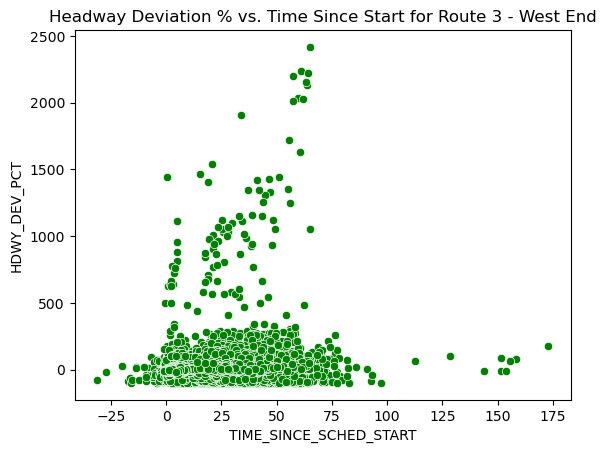

In [74]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='WEST END'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'green').set(title='Headway Deviation % vs. Time Since Start for Route 3 - West End');

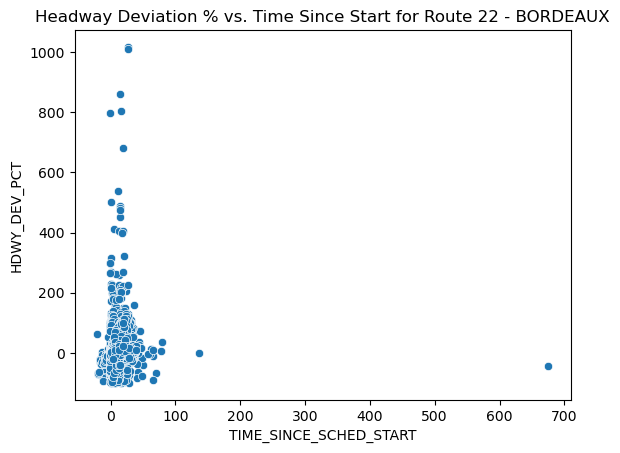

In [52]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='BORDEAUX'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 22 - BORDEAUX');

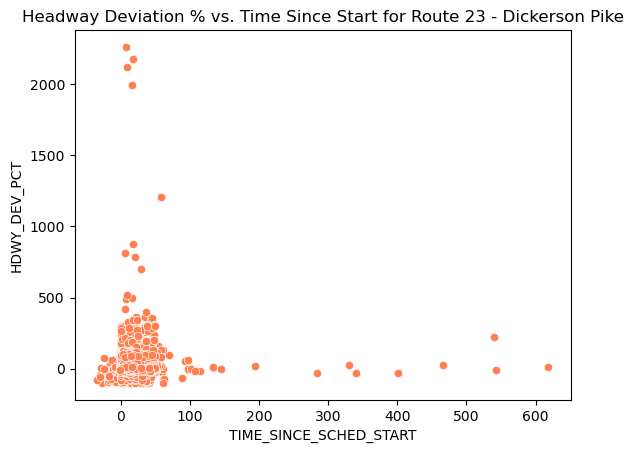

In [53]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='DICKERSON PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'coral').set(title='Headway Deviation % vs. Time Since Start for Route 23 - Dickerson Pike');

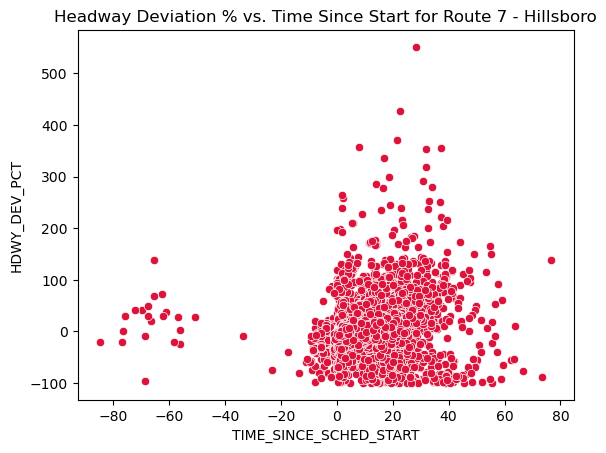

In [54]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='HILLSBORO'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'crimson').set(title='Headway Deviation % vs. Time Since Start for Route 7 - Hillsboro');

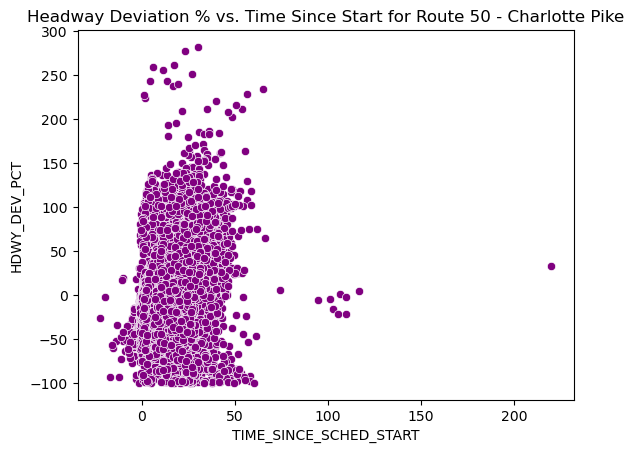

In [55]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='CHARLOTTE PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'purple').set(title='Headway Deviation % vs. Time Since Start for Route 50 - Charlotte Pike');

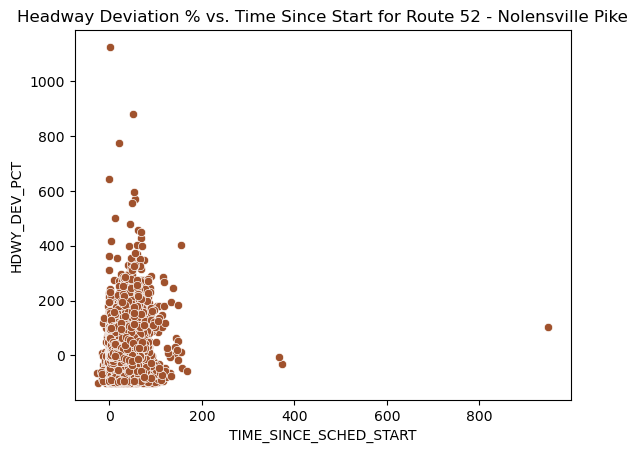

In [56]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='NOLENSVILLE PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'sienna').set(title='Headway Deviation % vs. Time Since Start for Route 52 - Nolensville Pike');

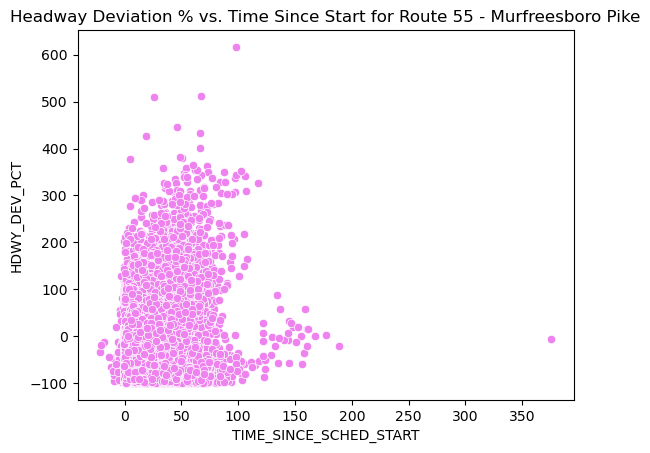

In [57]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='MURFREESBORO PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'violet').set(title='Headway Deviation % vs. Time Since Start for Route 55 - Murfreesboro Pike');

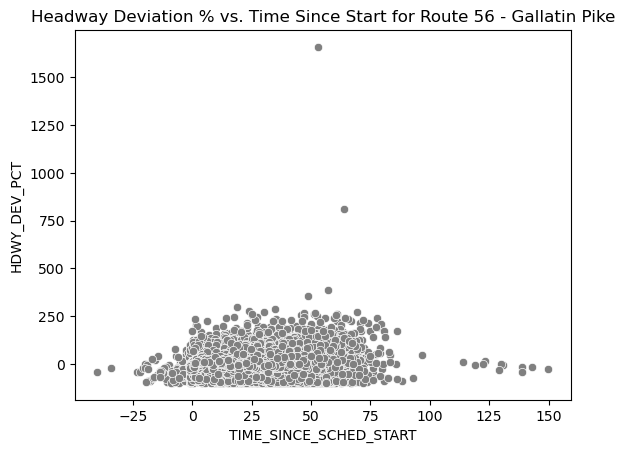

In [58]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='GALLATIN PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'grey').set(title='Headway Deviation % vs. Time Since Start for Route 56 - Gallatin Pike');